# Exploratory Data Analysis

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.interpolate import PchipInterpolator

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Basic inspection of the data

Let's start by loading the previously transformed and merged data.

In [74]:
# df = pd.read_csv('../data/transformed/transformed_dataset.csv', sep=',', decimal='.', dtype = {'Hour': int}, encoding='utf-8')
df = pd.read_parquet('../data/transformed/transformed_dataset.parquet', engine = 'pyarrow')

# Converting the dates to datetime format
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [75]:
print('The sape of the dataframe is:', df.shape)

print('Description of the numerical variables:')
df.describe()

print('Showing the first 5 individuals:')
df.head(5)

print('The data types are the following ones:')
df.dtypes

The sape of the dataframe is: (8761, 61)
Description of the numerical variables:


,Date,Hour,UK_B19,NE_B18,SP_B16,NE_B11,NE_B01,DK_B16,PO_B12,HU_B12,...,HU_B16,IT_Load,DK_Load,HU_Load,SP_Load,SE_Load,PO_Load,UK_Load,DE_Load,NE_Load
count,8761,8761.000000,3234.000000,8761.000000,8761.000000,8761.0,8761.000000,8760.000000,8760.000000,8688.000000,...,8761.000000,8760.000000,8760.000000,8761.000000,8761.000000,8760.000000,8760.000000,4763.000000,8761.000000,8761.000000
mean,2022-07-01 23:29:55.274511616,11.501313,780.093074,3633.986531,10575.511015,0.0,72.577902,240.973288,10.236301,34.451197,...,1406.509645,32676.303425,3918.898174,19823.071567,76001.905490,15081.896461,19679.561301,1690.755196,220354.869992,45833.287296
min,2021-12-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,16599.000000,2233.000000,4254.000000,17396.000000,9013.000000,11824.000000,467.000000,42196.000000,10326.000000
25%,2022-04-02 00:00:00,6.000000,250.000000,1065.000000,128.000000,0.0,60.000000,0.000000,0.000000,20.000000,...,0.000000,26496.000000,3392.000000,17640.000000,29381.000000,12548.000000,17019.500000,1305.000000,189007.000000,40567.000000
50%,2022-07-02 00:00:00,12.000000,743.500000,2745.000000,2252.000000,0.0,64.000000,9.000000,0.000000,32.000000,...,44.000000,32180.000000,3893.000000,19740.000000,89572.000000,14539.500000,19846.000000,1695.000000,220413.000000,44861.000000
75%,2022-10-01 00:00:00,18.000000,1240.750000,6161.000000,12857.000000,0.0,84.000000,367.250000,5.000000,56.000000,...,2487.000000,38346.500000,4420.000000,21843.000000,112464.000000,17444.500000,21998.000000,2028.500000,250079.000000,50970.000000
max,2022-12-31 00:00:00,23.000000,2060.000000,9675.000000,55896.000000,0.0,180.000000,1754.000000,58.000000,76.000000,...,7375.000000,51761.000000,5834.000000,28194.000000,151328.000000,24250.000000,27211.000000,2930.000000,314883.000000,70641.000000
std,NaN,6.923277,547.975250,2940.753252,15742.158260,0.0,42.425744,378.268023,19.226096,20.152222,...,2053.856321,7236.793834,703.131443,2992.116956,41176.893251,3118.141114,3164.761750,449.328857,38360.911736,7898.858777


Showing the first 5 individuals:


,Date,Hour,UK_B19,NE_B18,SP_B16,NE_B11,NE_B01,DK_B16,PO_B12,HU_B12,...,HU_B16,IT_Load,DK_Load,HU_Load,SP_Load,SE_Load,PO_Load,UK_Load,DE_Load,NE_Load
0,2021-12-31,23,NaN,1998,75,0,21,1.0,0.0,9.0,...,0,21121.0,3314.0,4254,20827,15331.0,14438.0,677.0,42196,10326
1,2022-01-01,0,NaN,6884,75,0,85,1.0,0.0,36.0,...,0,19756.0,3218.0,16457,19530,15331.0,13935.0,1244.0,165125,40706
2,2022-01-01,1,NaN,5518,75,0,85,1.0,0.0,36.0,...,0,18685.0,3126.0,15426,18383,15270.0,13579.0,1131.0,160415,39465
3,2022-01-01,2,NaN,5512,75,0,86,1.0,0.0,36.0,...,0,18124.0,3080.0,14781,17680,15150.0,13397.0,1091.0,158035,38923
4,2022-01-01,3,NaN,5668,75,0,85,1.0,0.0,36.0,...,0,18400.0,3044.0,14630,17396,15387.0,13364.0,969.0,157016,38211


The data types are the following ones:


Date       datetime64[ns]
Hour                int32
UK_B19            float64
NE_B18              int64
SP_B16              int64
                ...      
SE_Load           float64
PO_Load           float64
UK_Load           float64
DE_Load             int64
NE_Load             int64
Length: 61, dtype: object

We can see that the dataset has a total of 8761 rows. Everything seems to indicate that we have a single row for each hour of a year (365 days/year * 24 hours/day = 8761 hours/year).

Both energy quantities and loads seem to have reasonable values. There are no negative quantifications; the minimum is 0.

Some numerical variables have been parsed as `float`. "We will keep the format the same, as there will be no issue dealing with floats.

## Data cleaning

In this section, we will perform data cleaning. Once cleaned, we can group them as required in the statement and safely calculate the target. Let's start by looking at duplicate rows. 

### Duplicates

In [76]:
# Looking for duplicates
duplicate_idx = df.duplicated()
df[duplicate_idx]

,Date,Hour,UK_B19,NE_B18,SP_B16,NE_B11,NE_B01,DK_B16,PO_B12,HU_B12,...,HU_B16,IT_Load,DK_Load,HU_Load,SP_Load,SE_Load,PO_Load,UK_Load,DE_Load,NE_Load


It seems that there are no duplicate rows. We will check, just in case, for any duplicated dates.

In [77]:
duplicate_idx = df[['Date', 'Hour']].duplicated()
df[duplicate_idx]

,Date,Hour,UK_B19,NE_B18,SP_B16,NE_B11,NE_B01,DK_B16,PO_B12,HU_B12,...,HU_B16,IT_Load,DK_Load,HU_Load,SP_Load,SE_Load,PO_Load,UK_Load,DE_Load,NE_Load


Again, there seem to be no duplicate dates. Therefore, we can proceed with data cleaning.

### Missing values

We will start by checking how many missing values there are for each of the variables currently in the dataframe. Remember that at this point, we still have the variables for `EnergyGeneration` and `Load` for each country separately. 

In [78]:
# Computiung how many missing values do we have for each variable
missings_per_column = df.isna().sum()
# Only showing the ones that have missing values
missings_per_column[missings_per_column > 0]

UK_B19     5527
DK_B16        1
PO_B12        1
HU_B12       73
PO_B11        1
PO_B01        1
IT_B16        1
PO_B19        1
SE_B16        2
DK_B01        3
SE_B13     7730
DK_B18        1
DK_B19        1
IT_B12        1
SE_B12        2
SE_B19        2
PO_B16        1
IT_B19        1
IT_B09        1
IT_B18     3503
IT_B11        1
IT_B01        1
IT_Load       1
DK_Load       1
SE_Load       1
PO_Load       1
UK_Load    3998
dtype: int64

Given that we have `8761` rows, the variables that seem to pose more challenges are `UK_B19`, `SE_B13`, `IT_B18`, in the case of generated energies, and the variable `UK_Load`, in the case of loads.

Before deciding what to do with these variables, let's examine their contents.

In [79]:
critical_columns = missings_per_column[missings_per_column > 100].index
df[critical_columns].describe()

,UK_B19,SE_B13,IT_B18,UK_Load
count,3234.000000,1031.0,5258.000000,4763.000000
mean,780.093074,0.0,3.860403,1690.755196
std,547.975250,0.0,6.678285,449.328857
min,0.000000,0.0,0.000000,467.000000
25%,250.000000,0.0,0.000000,1305.000000
50%,743.500000,0.0,1.000000,1695.000000
75%,1240.750000,0.0,4.000000,2028.500000
max,2060.000000,0.0,30.000000,2930.000000


One advantage of time series is that we can represent them over time and observe their evolution. This way, we can form a preliminary idea of the trend in the data and assess various methodologies to impute potential missing values.

In [80]:
# Method to plot the evolution of some variable
def plot_evolution(df, column):
    """
    Shows the evolution of an specific column of a pandas dataframe.

    Parameters:
    - df: Pandas DataFrame
    - column: Name of the column for which to plot its evolution
    """
    # Ensure the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    fig = plt.figure(figsize=(10, 6))
    
    # Filter rows with non-null values in the current column
    df_filtered = df[['Date', 'Hour', column]].dropna()

    # Plot the points with filled circles and connect them with thin lines
    _ = plt.plot(df_filtered['Date'] + pd.to_timedelta(df_filtered['Hour'], unit='h'), df_filtered[column],
             marker='o', linestyle='-', markersize=2, linewidth=0.8, label=column)

    # Customize the appearance of the plot
    _ = plt.title(f'Evolution in time of column {column}')
    _ = plt.xlabel('Date and Hour')
    _ = plt.ylabel(column)
    _ = plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # date_range = pd.date_range(start='2022-01-01', end='2023-01-01', freq='H')
    # fig.axes[0].set_xticks(date_range)
    
    fig.axes[0].set_xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
    
    # Show the plot
    plt.show()


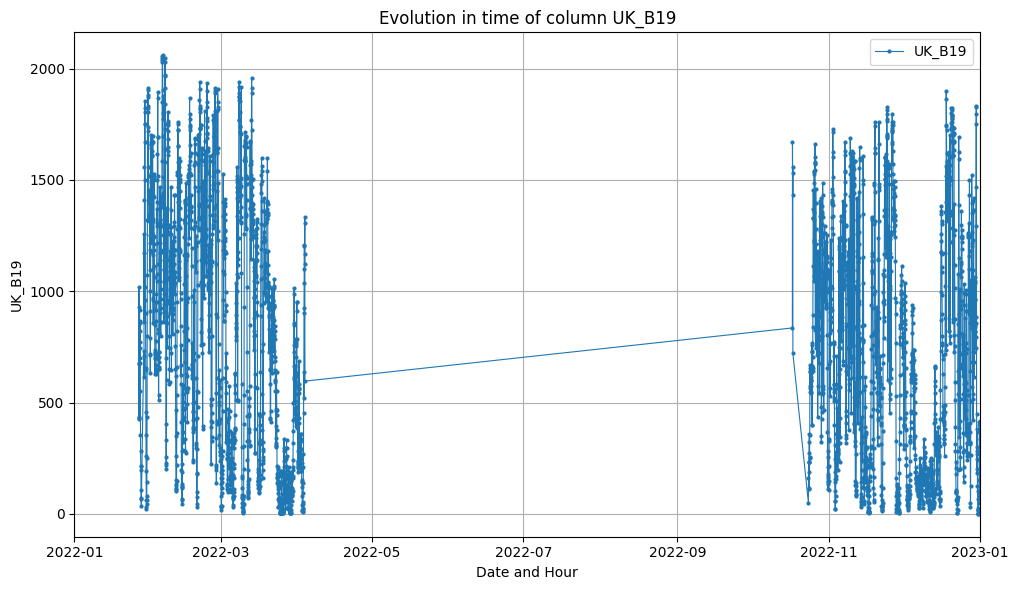

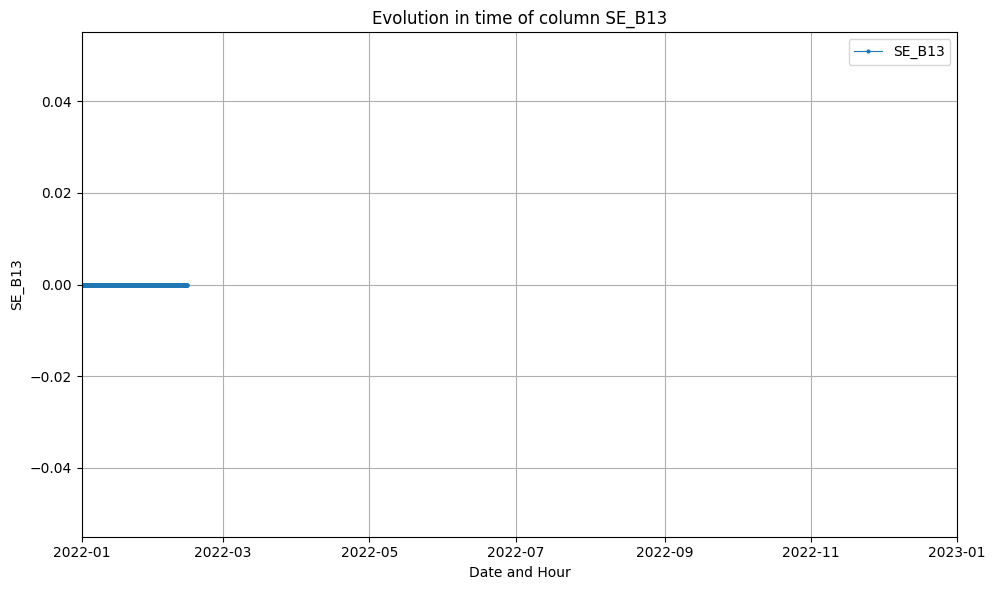

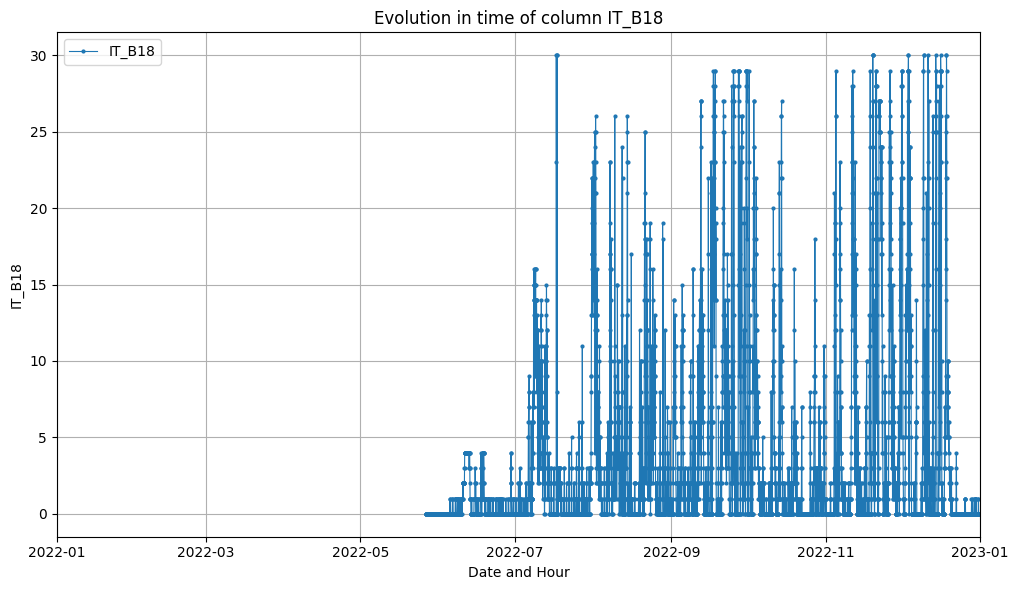

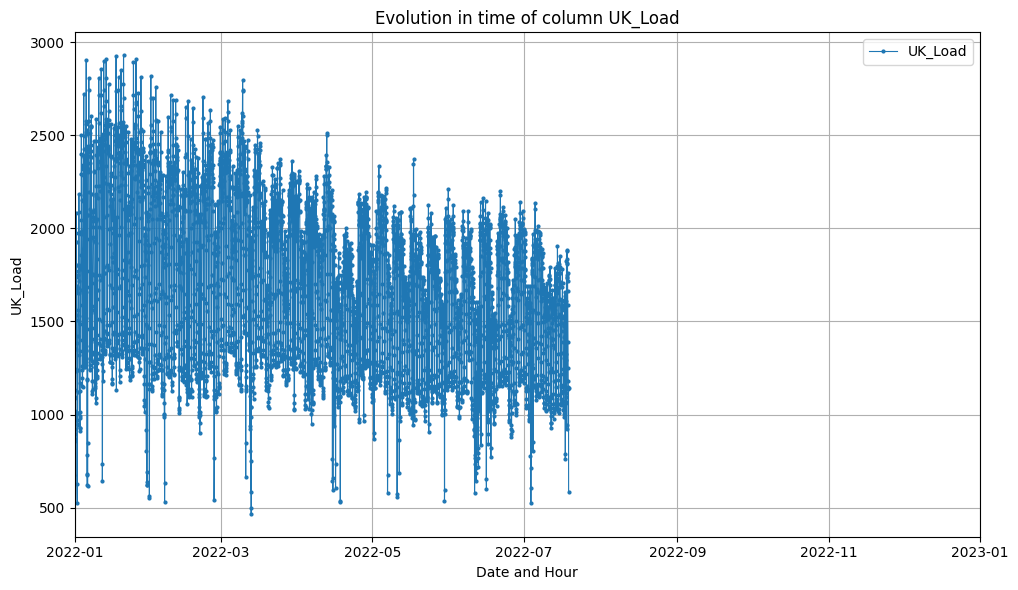

In [81]:
# Iterate over the critical columns and create a figure for each one
for column in critical_columns:
    plot_evolution(df, column)

We can see that it's challenging to discern the data trend due to significant variability from one timestamp to another. Therefore, we will recalculate the value of each point as the average of the previous `n` values and display the graphs again.

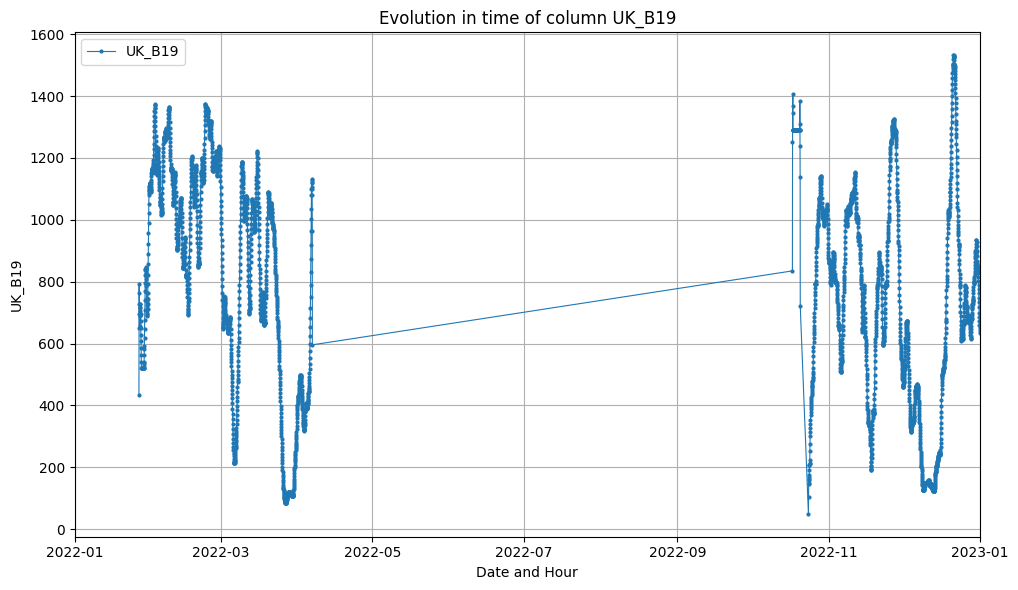

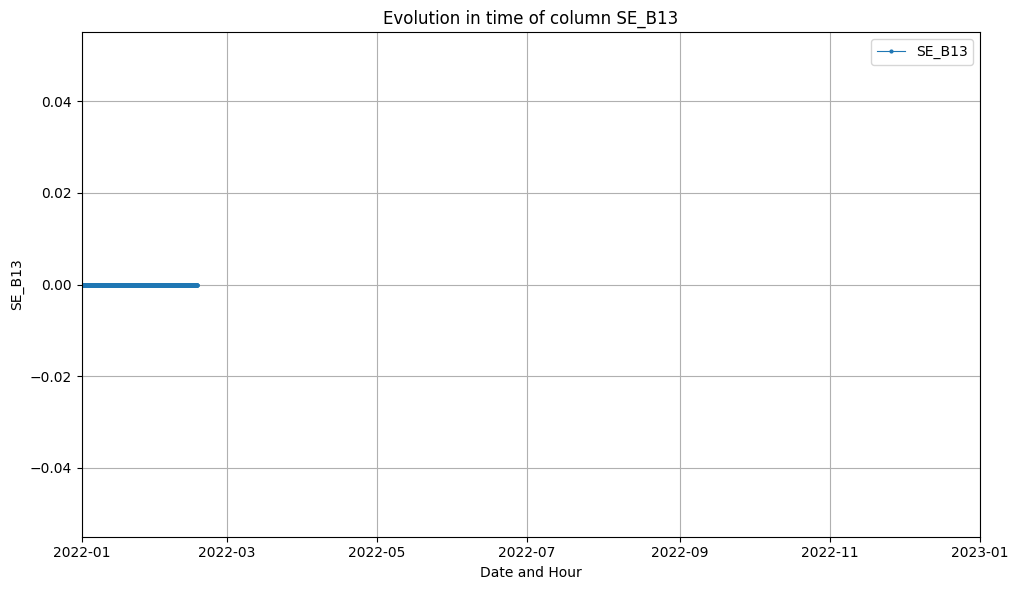

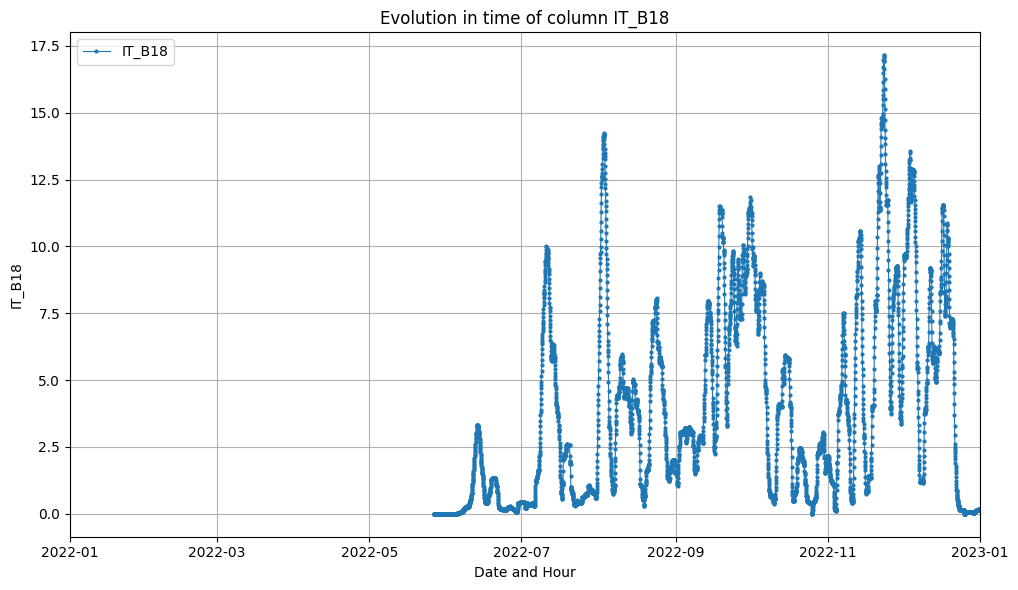

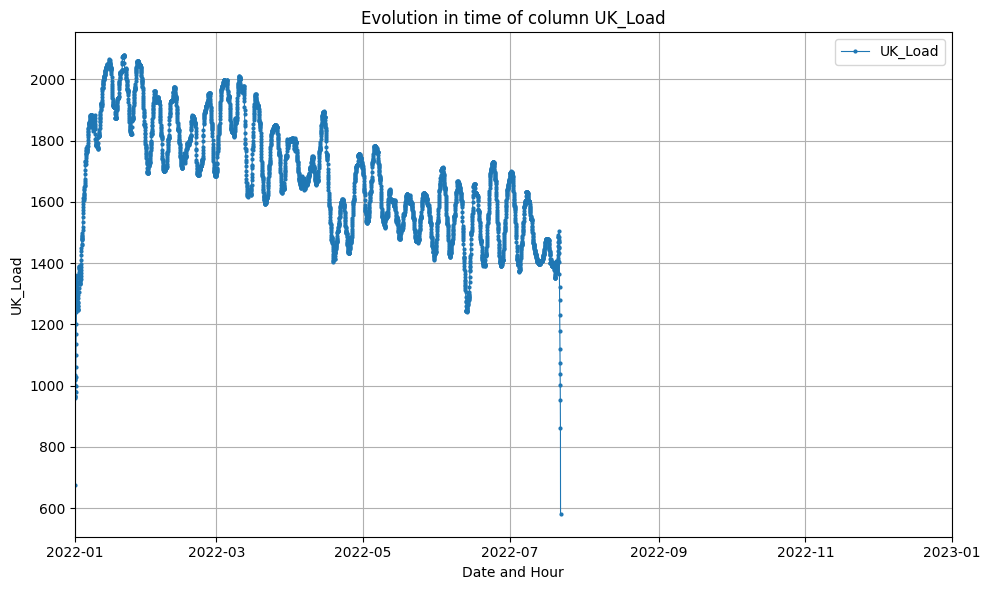

In [82]:
# Creating a copy of the original dataframe
df_copy = df[['Date', 'Hour'] + critical_columns.to_list()].copy()

# Computing the rolling mean of each critical column with a window size of 5
for column in critical_columns:
    df_copy[column] = compute_rolling_mean(df_copy, column, window_size = 72)
    plot_evolution(df_copy, column)

Now, we will carry out a basic inspection of the data and check the types of variables we have, as well as the basic form and structure they exhibit.

From the previous graphs, we can draw some conclusions:

1. Firstly, visualizing each value as the average of previous measures provides much smoother metrics, allowing us to better infer the data trend over time.
2. Regarding `UK_B19`: A slight upward trend can be inferred. However, it is challenging to interpret if the data follows a specific distribution. One possibility for imputing missing values could be linear interpolation or even polynomial interpolation.
3. Regarding `SE_B13`: In this case, there is not much to comment on. We can see that the variable encodes information about Marine energy generated at the beginning of the year until a little before March. Therefore, we assume that this type of energy is 0 for the rest of the year.
4. Regarding `IT_B18`: Similar to `UK_B19`, the data suggests that onshore wind energy generation has an upward trend from around June. There are numerous dates, however, where the generation of this type of energy is 0. Before June, the generation also seems to be consistently zero. Additionally, during the months when this type of energy is generated, we observe increasingly higher peaks at certain moments (possibly due to specific cyclic natural phenomena that are on the rise).
5. Regarding `UK_Load`: We see that it starts the year with values on an upward trend. Then, gradually (and with a lot of variability in the original data graph), the load decreases until the end of July, where the load values drop drastically.

**General comment:** To evaluate whether all these forms of energy generation indeed follow the observed distributions and trends, it would be ideal to consider data from other years. However, due to project time constraints and for simplicity, we will continue working only with the 2022 data and carry out the mentioned imputations.

It seems reasonable to consider performing imputation of missing values using regression models or more complex interpolations, such as polynomial interpolation. However, we believe that linear interpolation could be suitable in this case, and that's what we will use.

In [83]:
df.apply(lambda row: row['Date'].replace(hour = row['Hour']), axis = 1)

,Date,Hour,UK_B19,NE_B18,SP_B16,NE_B11,NE_B01,DK_B16,PO_B12,HU_B12,...,HU_B16,IT_Load,DK_Load,HU_Load,SP_Load,SE_Load,PO_Load,UK_Load,DE_Load,NE_Load
0,2021-12-31,23,NaN,1998,75,0,21,1.0,0.0,9.0,...,0,21121.0,3314.0,4254,20827,15331.0,14438.0,677.0,42196,10326
1,2022-01-01,0,NaN,6884,75,0,85,1.0,0.0,36.0,...,0,19756.0,3218.0,16457,19530,15331.0,13935.0,1244.0,165125,40706
2,2022-01-01,1,NaN,5518,75,0,85,1.0,0.0,36.0,...,0,18685.0,3126.0,15426,18383,15270.0,13579.0,1131.0,160415,39465
3,2022-01-01,2,NaN,5512,75,0,86,1.0,0.0,36.0,...,0,18124.0,3080.0,14781,17680,15150.0,13397.0,1091.0,158035,38923
4,2022-01-01,3,NaN,5668,75,0,85,1.0,0.0,36.0,...,0,18400.0,3044.0,14630,17396,15387.0,13364.0,969.0,157016,38211


                DateTime       Date  Hour  UK_B19  NE_B18  SP_B16  NE_B11  \
0    2021-12-31 23:00:00 2021-12-31  23.0     NaN  1998.0    75.0     0.0   
1    2022-01-01 23:00:00 2022-01-01  23.0     NaN  8218.0    15.0     0.0   
2    2022-01-01 22:00:00 2022-01-01  22.0     NaN  8362.0     0.0     0.0   
3    2022-01-01 21:00:00 2022-01-01  21.0     NaN  7798.0    14.0     0.0   
4    2022-01-01 20:00:00 2022-01-01  20.0     NaN  7701.0    49.0     0.0   
...                  ...        ...   ...     ...     ...     ...     ...   
8756 2022-12-31 01:00:00 2022-12-31   NaN     NaN     NaN     NaN     NaN   
8757 2022-12-31 00:00:00 2022-12-31   NaN     NaN     NaN     NaN     NaN   
8758 2022-12-31 22:00:00 2022-12-31   NaN     NaN     NaN     NaN     NaN   
8759 2022-12-31 10:00:00 2022-12-31   NaN     NaN     NaN     NaN     NaN   
8760 2022-12-31 23:00:00 2022-12-31   NaN     NaN     NaN     NaN     NaN   

      NE_B01  DK_B16  PO_B12  ...  IT_Load  DK_Load  HU_Load  SP_Load  \
0 

/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_53907/1792074237.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['UK_Load_Interpolated'] = interpolator(df_nan.index)


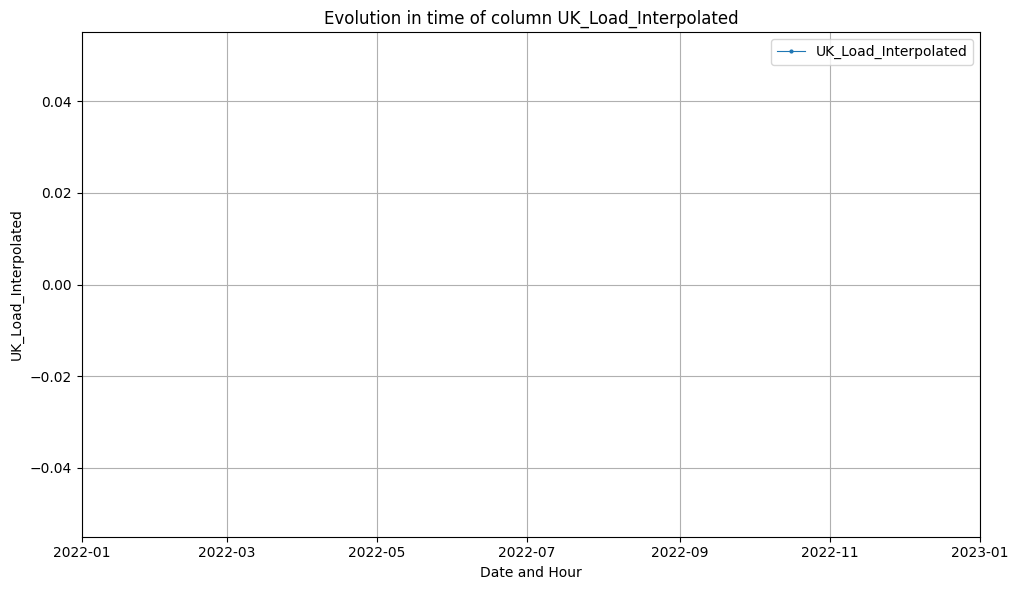

In [72]:
# Combina 'Date' i 'Hour' en un índex temporal
# df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Hour'].astype(str), format='%Y-%m-%d %H')
df['DateTime'] = df.apply(lambda row: row['Date'].replace(hour = row['Hour']), axis = 1)
df = df.set_index('DateTime')

# Separating the data with nan's
df_nan = df[df['UK_Load'].isna()]
df_non_nan = df.dropna(subset=['UK_Load'])

# Interpola els punts sense NaN utilitzant PCHIP
interpolator = PchipInterpolator(df_non_nan.index, df_non_nan['UK_Load'])
df_nan['UK_Load_Interpolated'] = interpolator(df_nan.index)

# Combina els resultats en un nou DataFrame
df_interpolated = pd.concat([df_non_nan, df_nan[['Date', 'UK_Load_Interpolated']]])

# Ordena el DataFrame per 'Date' per a una millor visualització
df_interpolated = df_interpolated.sort_values(by='Date')

# Reinicia els índexs si cal
df_interpolated = df_interpolated.reset_index()

# Imprimeix el DataFrame final
print(df_interpolated)

plot_evolution(df_interpolated, 'UK_Load_Interpolated')